In [2]:
import numpy as np
import pandas as pd
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update({"figure.dpi": 1000, "font.family": "Nimbus Roman"})

import matplotlib.font_manager as fm

# Get list of available fonts
available_fonts = [f.name for f in fm.fontManager.ttflist]


print(available_fonts)


['STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'STIXGeneral', 'DejaVu Serif', 'STIXSizeThreeSym', 'cmb10', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeOneSym', 'cmmi10', 'cmss10', 'STIXGeneral', 'DejaVu Sans Display', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'STIXSizeFiveSym', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeThreeSym', 'cmr10', 'cmtt10', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeFourSym', 'cmex10', 'cmsy10', 'STIXNonUnicode', 'Liberation Serif', 'Noto Serif Devanagari', 'Noto Serif Myanmar', 'Noto Serif Hebrew', 'Noto Serif Display', 'Noto Serif Georgian', 'Noto Serif Bengali', 'Noto Serif Display', 'C059', 'Noto Looped Lao', 'Roboto', 'Noto Sans Mono', 'Noto Sans Arabic', 'Noto Serif Devanagari', 'Noto Sans Ethiopic', 'Noto Sans Khmer', 'Noto Serif Tamil Slanted', 'Noto Sans Bengali', 'Noto Sans E

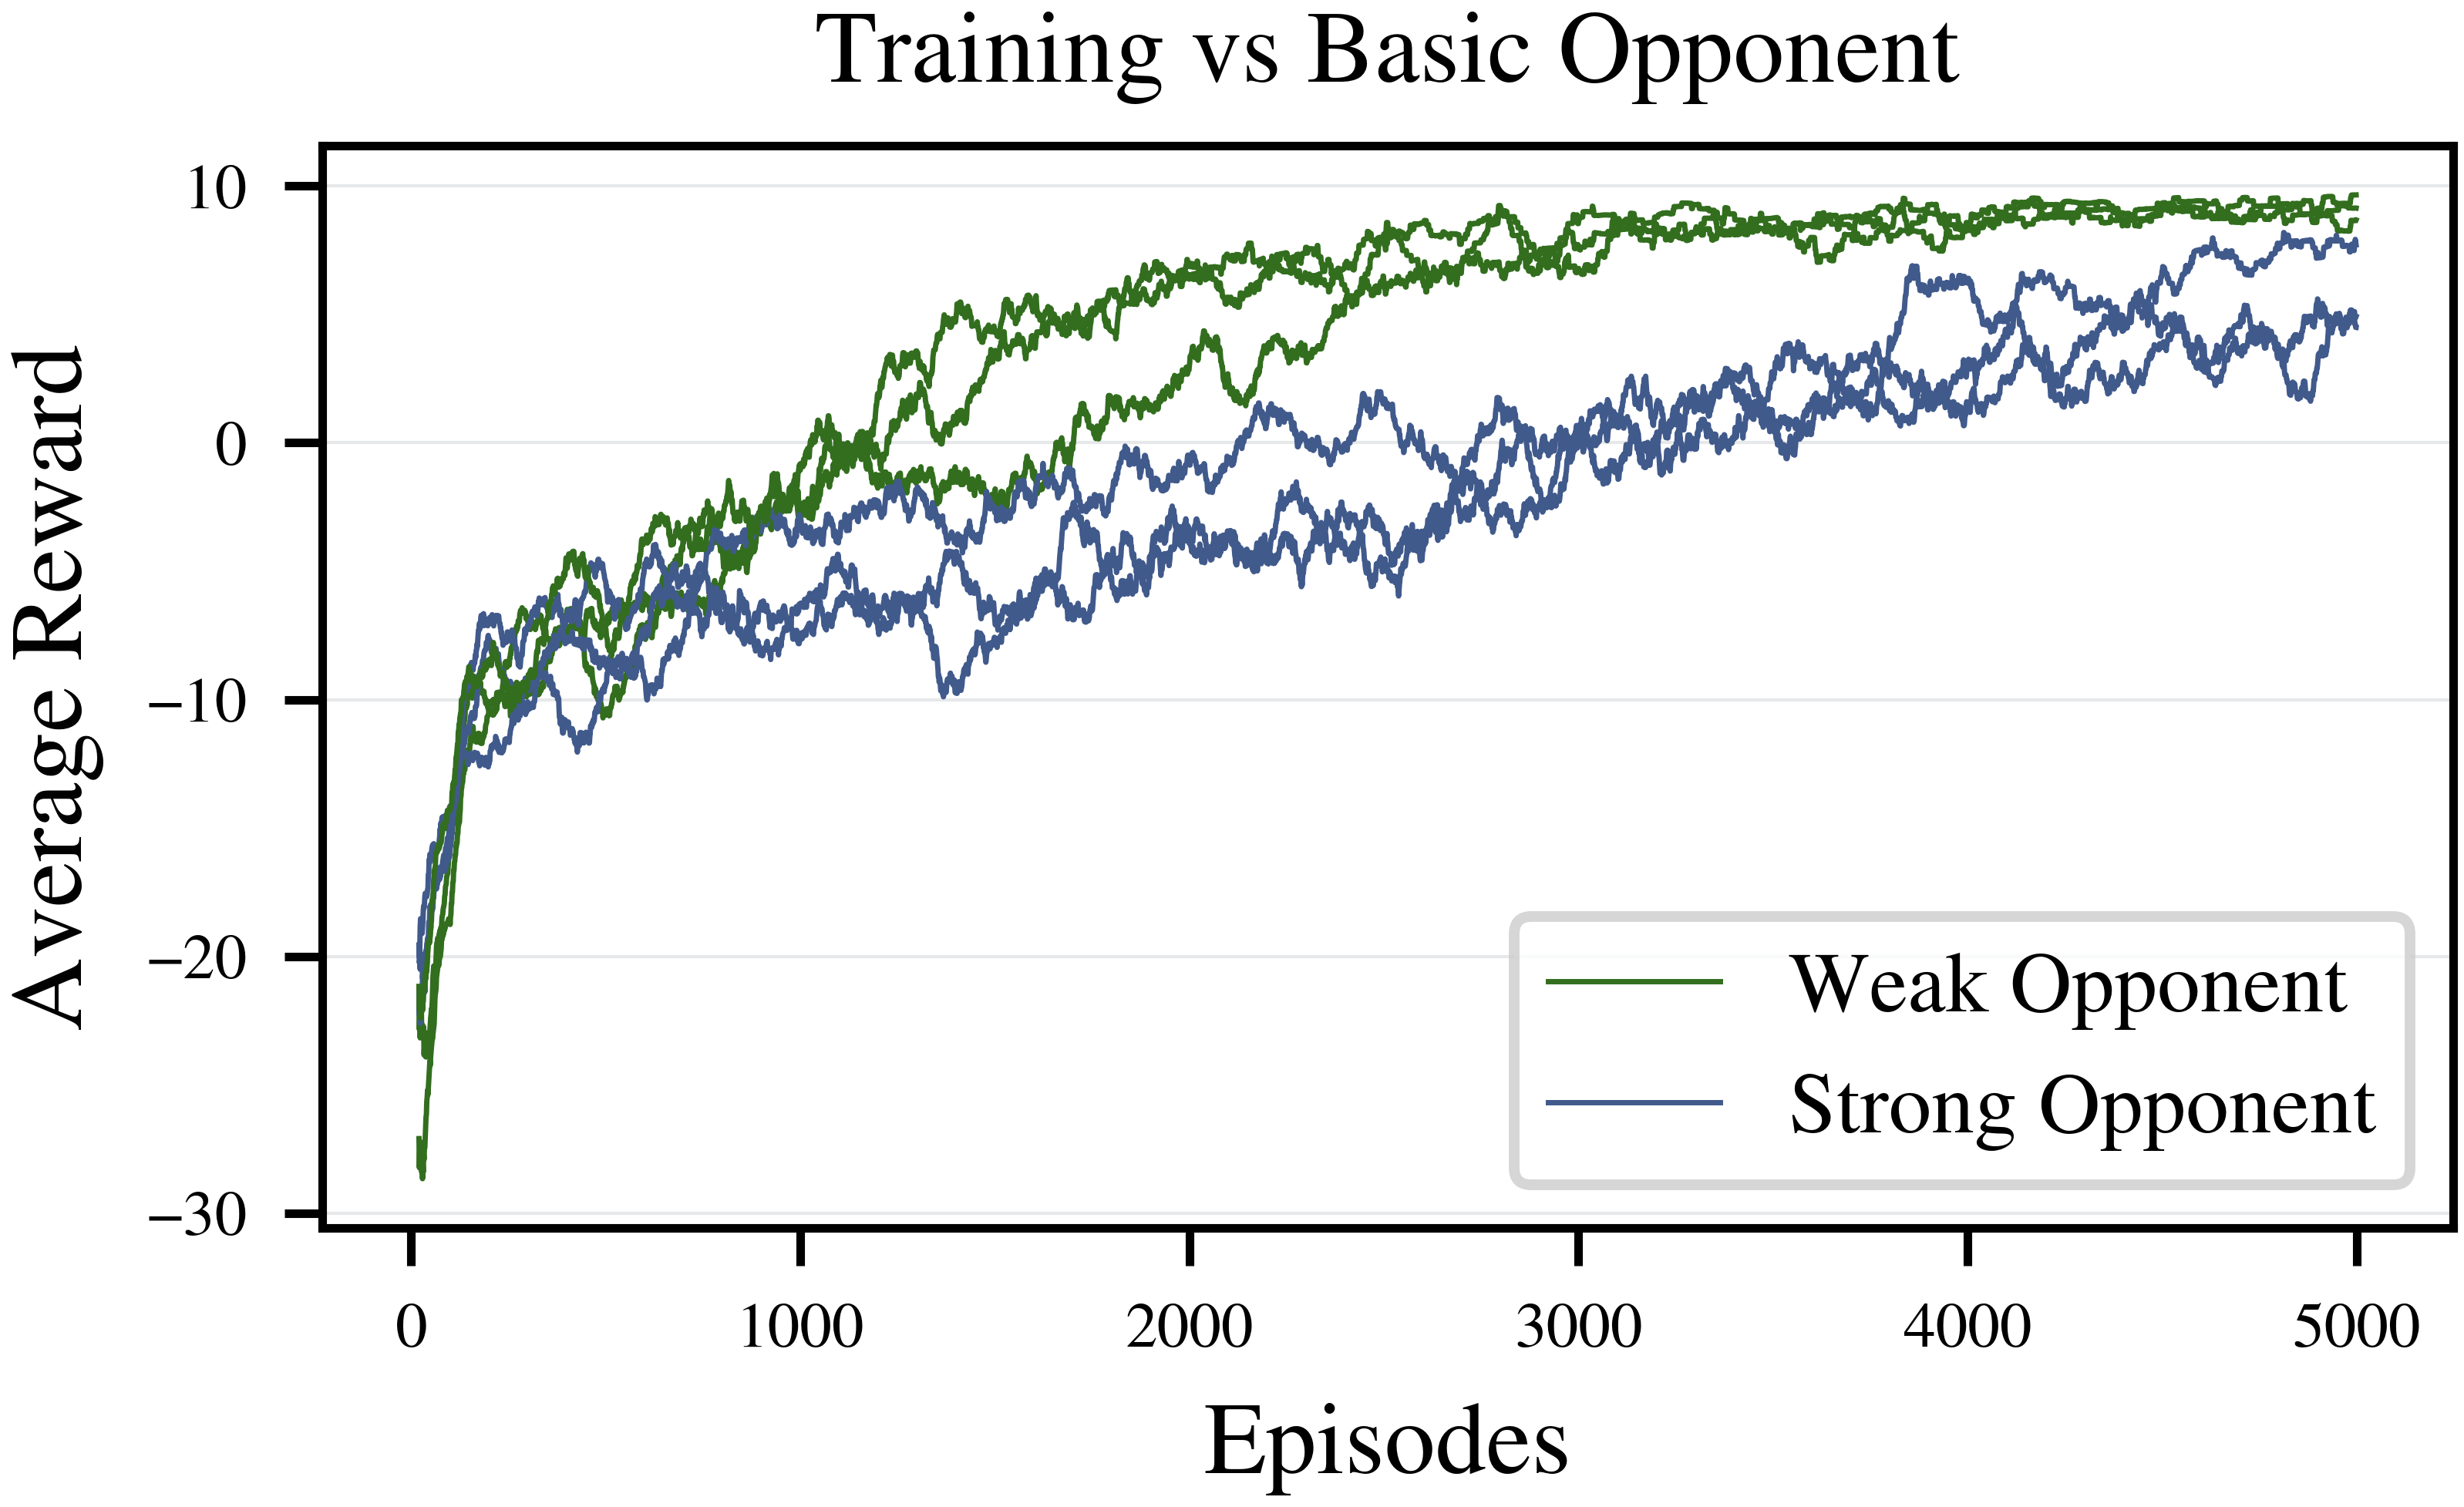

In [ ]:
"""
config state:

alpha: 0.0003
beta: 0.0003
gamma: 0.99
n_actions: 4
max_size: 1000000
tau: 0.005
layer1_size: 256
layer2_size: 256
batch_size: 256
reward_scale: 2
checkpoint_dir: "SAC/SelfMade/tmp/checkpoints"
log_dir: "runs/hockey_sac_training"
n_games: 5000
resume_training: False
opponent_update_interval: 20
win_rate_threshold: 0.6

"""

paths = [
    'csv_data/against_opponent/training_log_basic_weak_bot1.csv',
    'csv_data/against_opponent/training_log_basic_weak_bot2.csv',
    'csv_data/against_opponent/training_log_basic_strong_bot1.csv',
    'csv_data/against_opponent/training_log_basic_strong_bot2.csv',
    'csv_data/against_opponent/training_log_basic_strong_bot3.csv',
    'csv_data/against_opponent/training_log_basic_weak_bot3.csv'
]


smoothing_window = 100
fig, ax = plt.subplots()


for path in paths:
    df = pd.read_csv(path)
    color = rgb.tue_darkblue if 'strong' in path else rgb.tue_darkgreen


    episodes = df['episode'][0:5000]
    rewards = df['reward'][0:5000]

    smoothed_rewards = rewards.rolling(window=smoothing_window, min_periods=1).mean()

    ax.plot(episodes[20:], smoothed_rewards[20:], ms=0.1, lw=0.5, color=color, zorder=3,
            label='Strong Opponent' if 'strong' in path else 'Weak Opponent')



#ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.3, linewidth=0.3, zorder=1)


ax.set_xlabel('Episodes', fontsize=9.5)
ax.set_ylabel('Average Reward', fontsize=9.5)
ax.set_title('Training vs Basic Opponent', fontsize=9.5)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, loc='best')

plt.show()
fig.savefig('fig_SAC_TrainingVsOpponent.pdf')

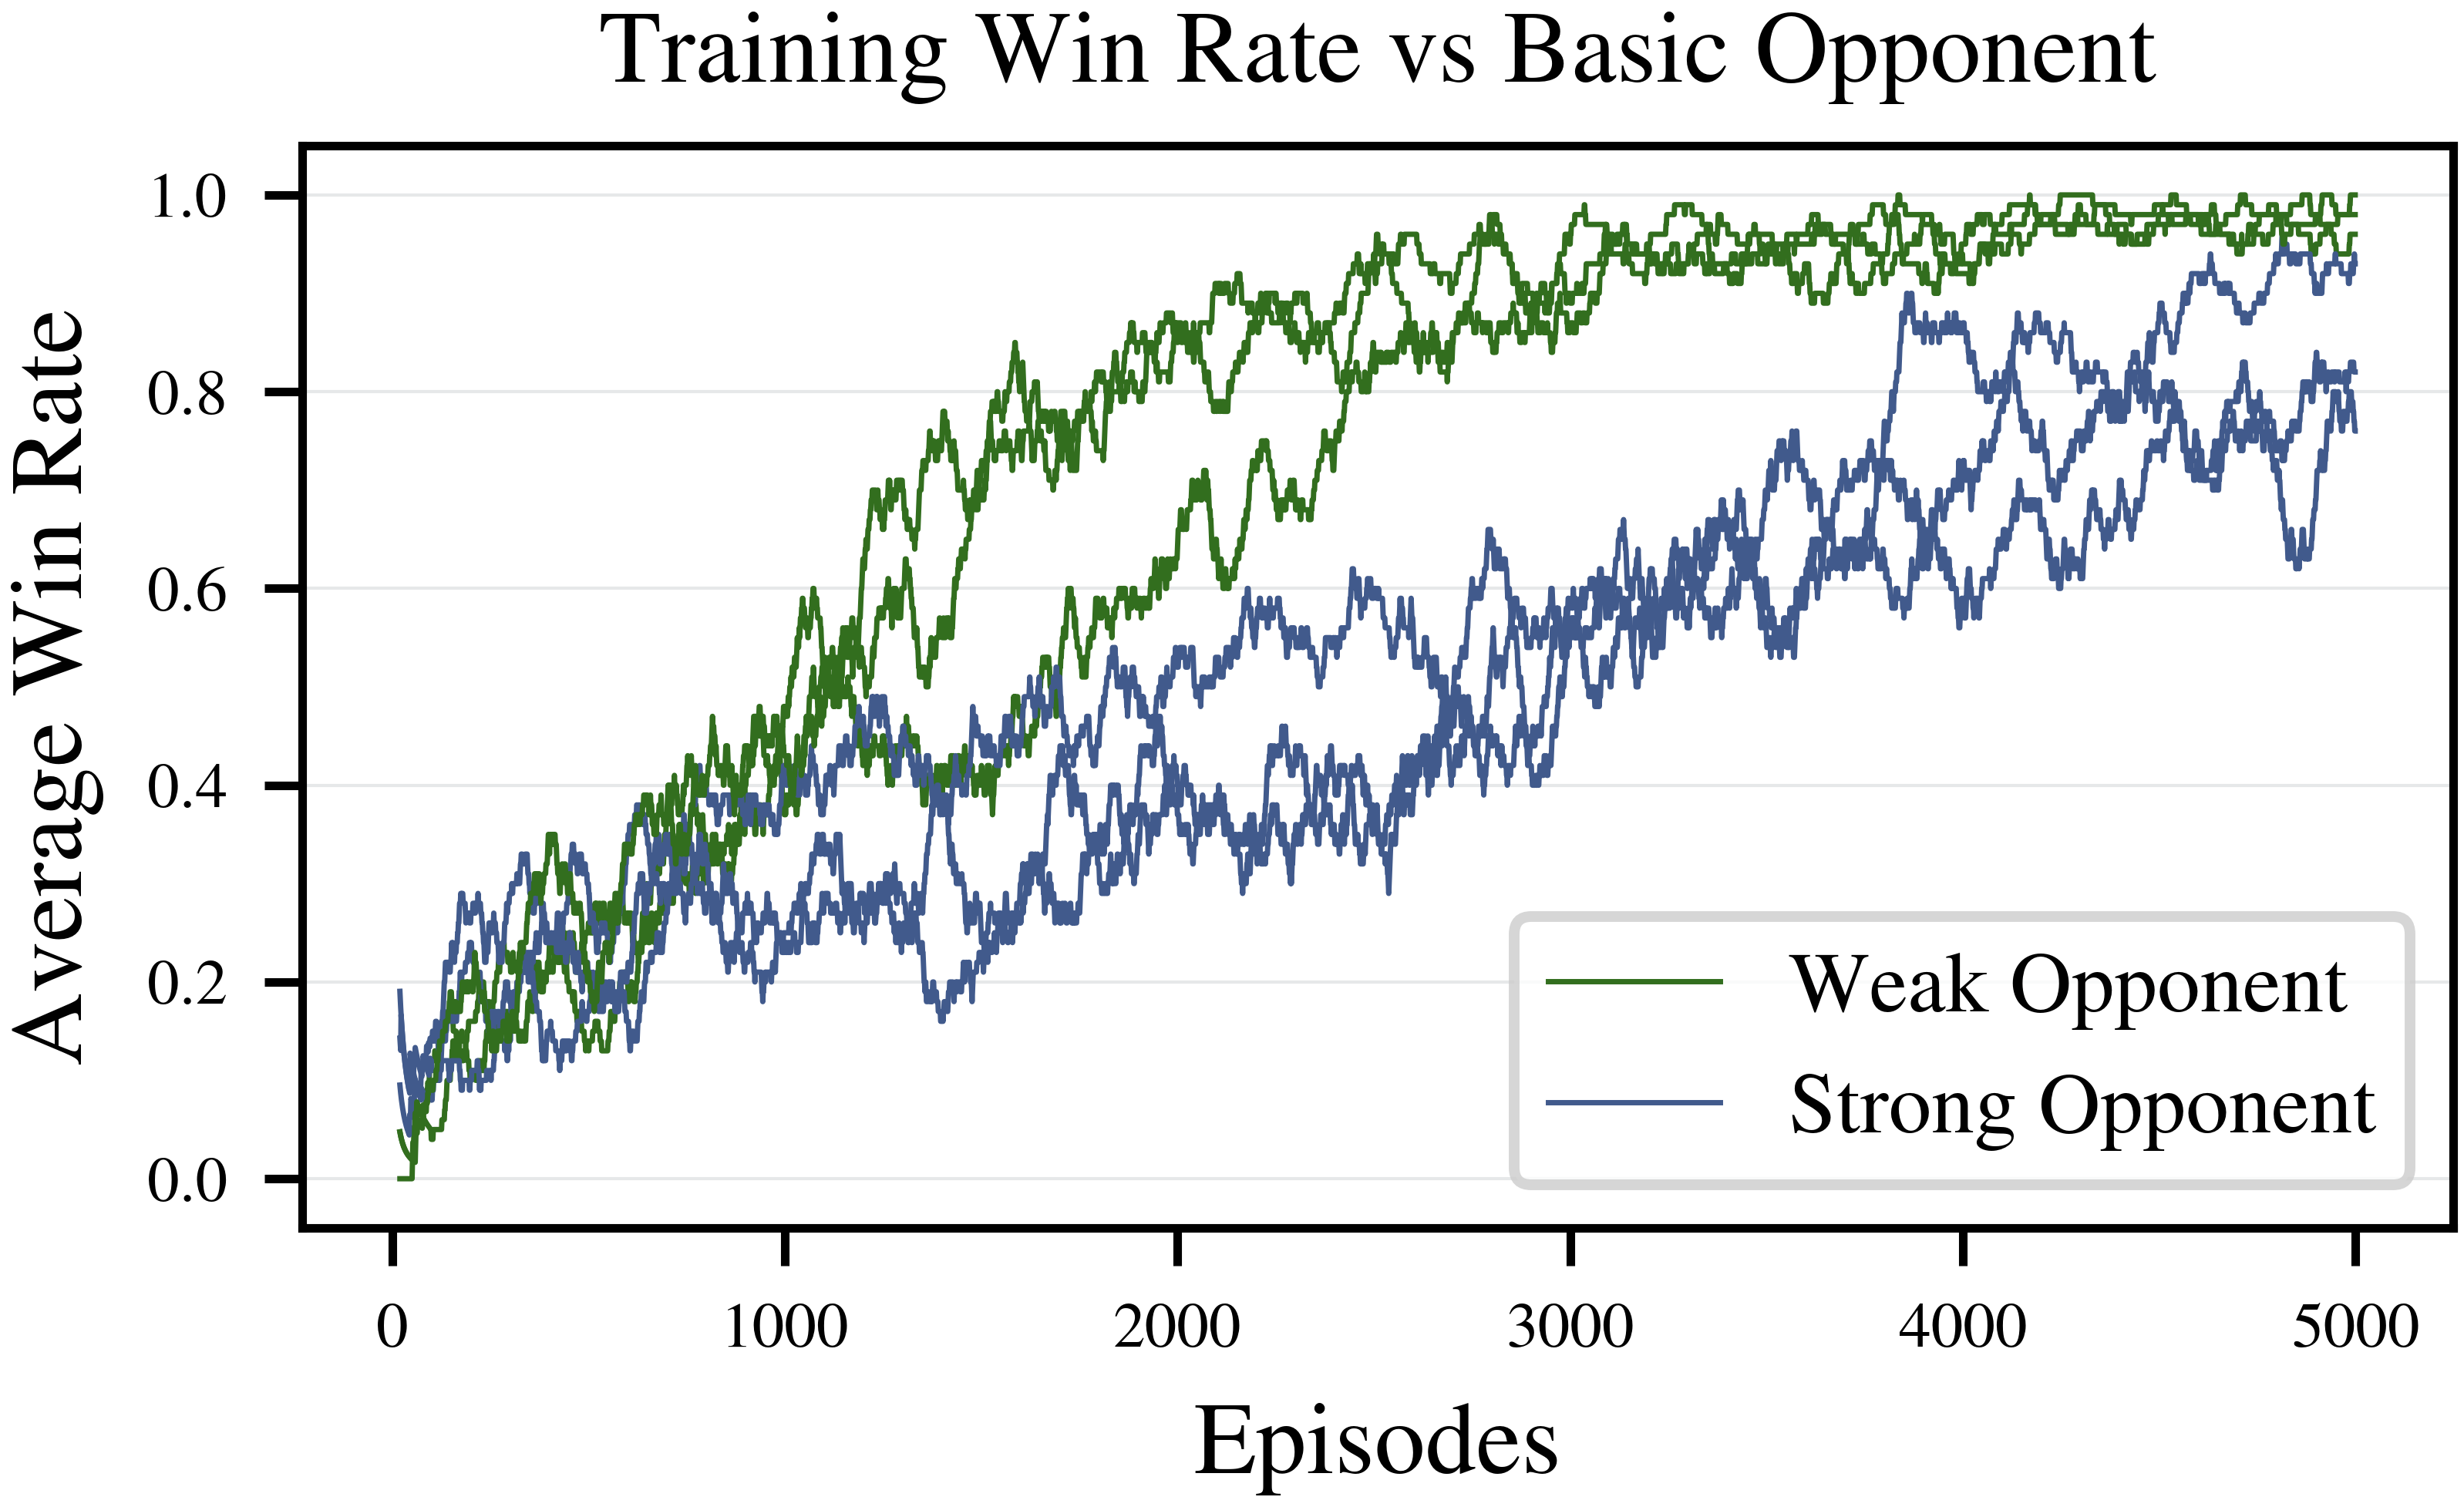

In [ ]:
paths = [
    'csv_data/against_opponent/training_log_basic_weak_bot1.csv',
    'csv_data/against_opponent/training_log_basic_weak_bot2.csv',
    'csv_data/against_opponent/training_log_basic_strong_bot1.csv',
    'csv_data/against_opponent/training_log_basic_strong_bot2.csv',
    'csv_data/against_opponent/training_log_basic_strong_bot3.csv',
    'csv_data/against_opponent/training_log_basic_weak_bot3.csv'
]


smoothing_window = 100
fig, ax = plt.subplots()

for path in paths:
    df = pd.read_csv(path)
    color = rgb.tue_darkblue if 'strong' in path else rgb.tue_darkgreen

    episodes = df['episode'][0:5000]
    rewards = df['reward'][0:5000]
    
    # Convert rewards to binary wins: 1 if reward > 0, else 0
    wins = (rewards >= 0).astype(int)
    # Compute the rolling average win rate
    smoothed_win_rate = wins.rolling(window=smoothing_window, min_periods=1).mean()

    ax.plot(episodes[20:], smoothed_win_rate[20:], ms=0.1, lw=0.5, color=color, zorder=3,
            label='Strong Opponent' if 'strong' in path else 'Weak Opponent')

ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.3, linewidth=0.3, zorder=1)

ax.set_xlabel('Episodes', fontsize=9.5)
ax.set_ylabel('Average Win Rate', fontsize=9.5)
ax.set_title('Training Win Rate vs Basic Opponent', fontsize=9.5)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, loc='best')

plt.show()
fig.savefig('fig_SAC_TrainingVsOpponent_WinRate.pdf')


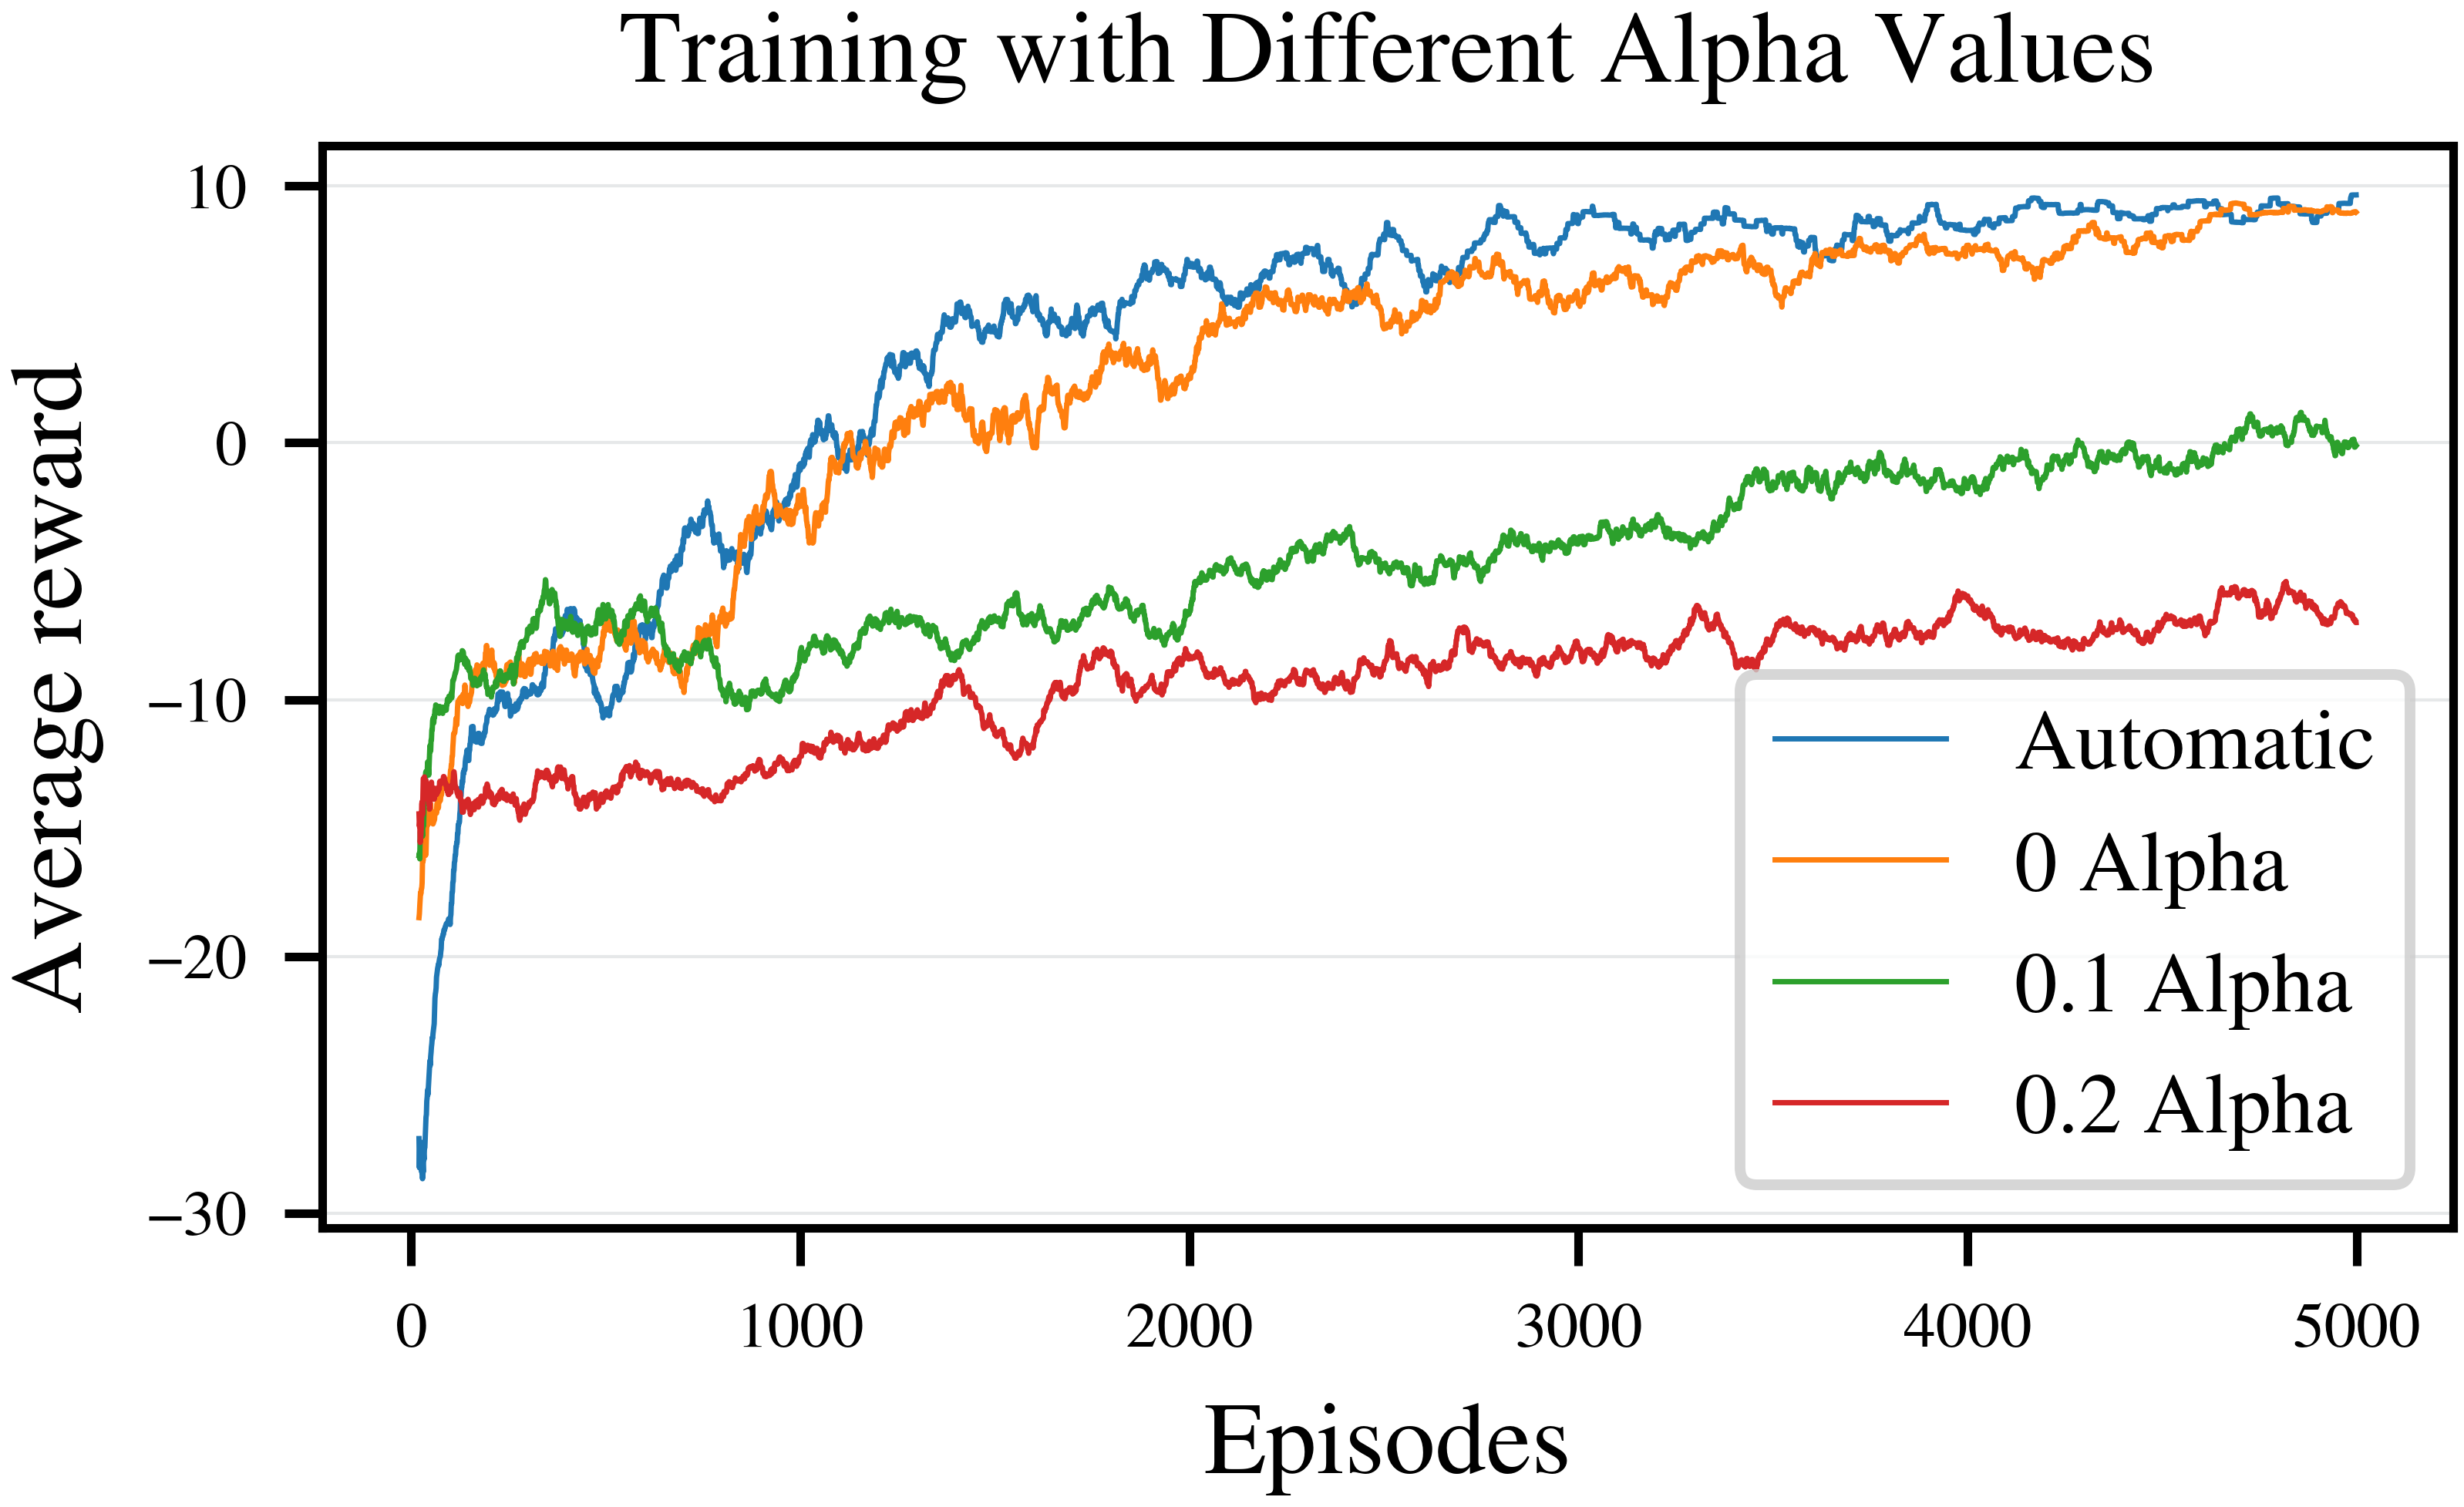

In [16]:
paths = {
    'Automatic':'csv_data/against_opponent/training_log_basic_weak_bot1.csv',
    '0 Alpha':'csv_data/alpha_experiments/training_log_0_alpha.csv',
    '0.1 Alpha': 'csv_data/alpha_experiments/training_log_01_alpha.csv',  
    '0.2 Alpha': 'csv_data/alpha_experiments/training_log_02alpha.csv',   
}


smoothing_window = 100
fig, ax = plt.subplots()


for file in paths:
    path = paths[file]
    df = pd.read_csv(path)

    episodes = df['episode'][0:5000]
    rewards = df['reward'][0:5000]

    smoothed_rewards = rewards.rolling(window=smoothing_window, min_periods=1).mean()

    ax.plot(episodes[20:], smoothed_rewards[20:], ms=0.1, lw=0.5, zorder=3,
            label=file)



#ax.set_ylim([0, 400])
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.3, linewidth=0.3, zorder=1)

#ax.set_xlim([years[0] - 0.5, years[-1] + 1])
#ax.set_xticks(episodes[1::2])
#ax.tick_params(axis='x', rotation=90)
#ax.tick_params(axis='both', labelsize=8, width=0.3, length=2)

ax.set_xlabel('Episodes', fontsize=9.5)
ax.set_ylabel('Average reward', fontsize=9.5)
ax.set_title('Training with Different Alpha Values', fontsize=9.5)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, loc='best')

plt.show()
fig.savefig('fig_SAC_TrainingWithDifferentAlphas.pdf')

/tmp/ipykernel_1734069/1781406160.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.5, 0.85, 0.1])  # Leave space for legend
/tmp/ipykernel_1734069/1781406160.py:74: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.5, 0.85, 0.1])  # Leave space for legend


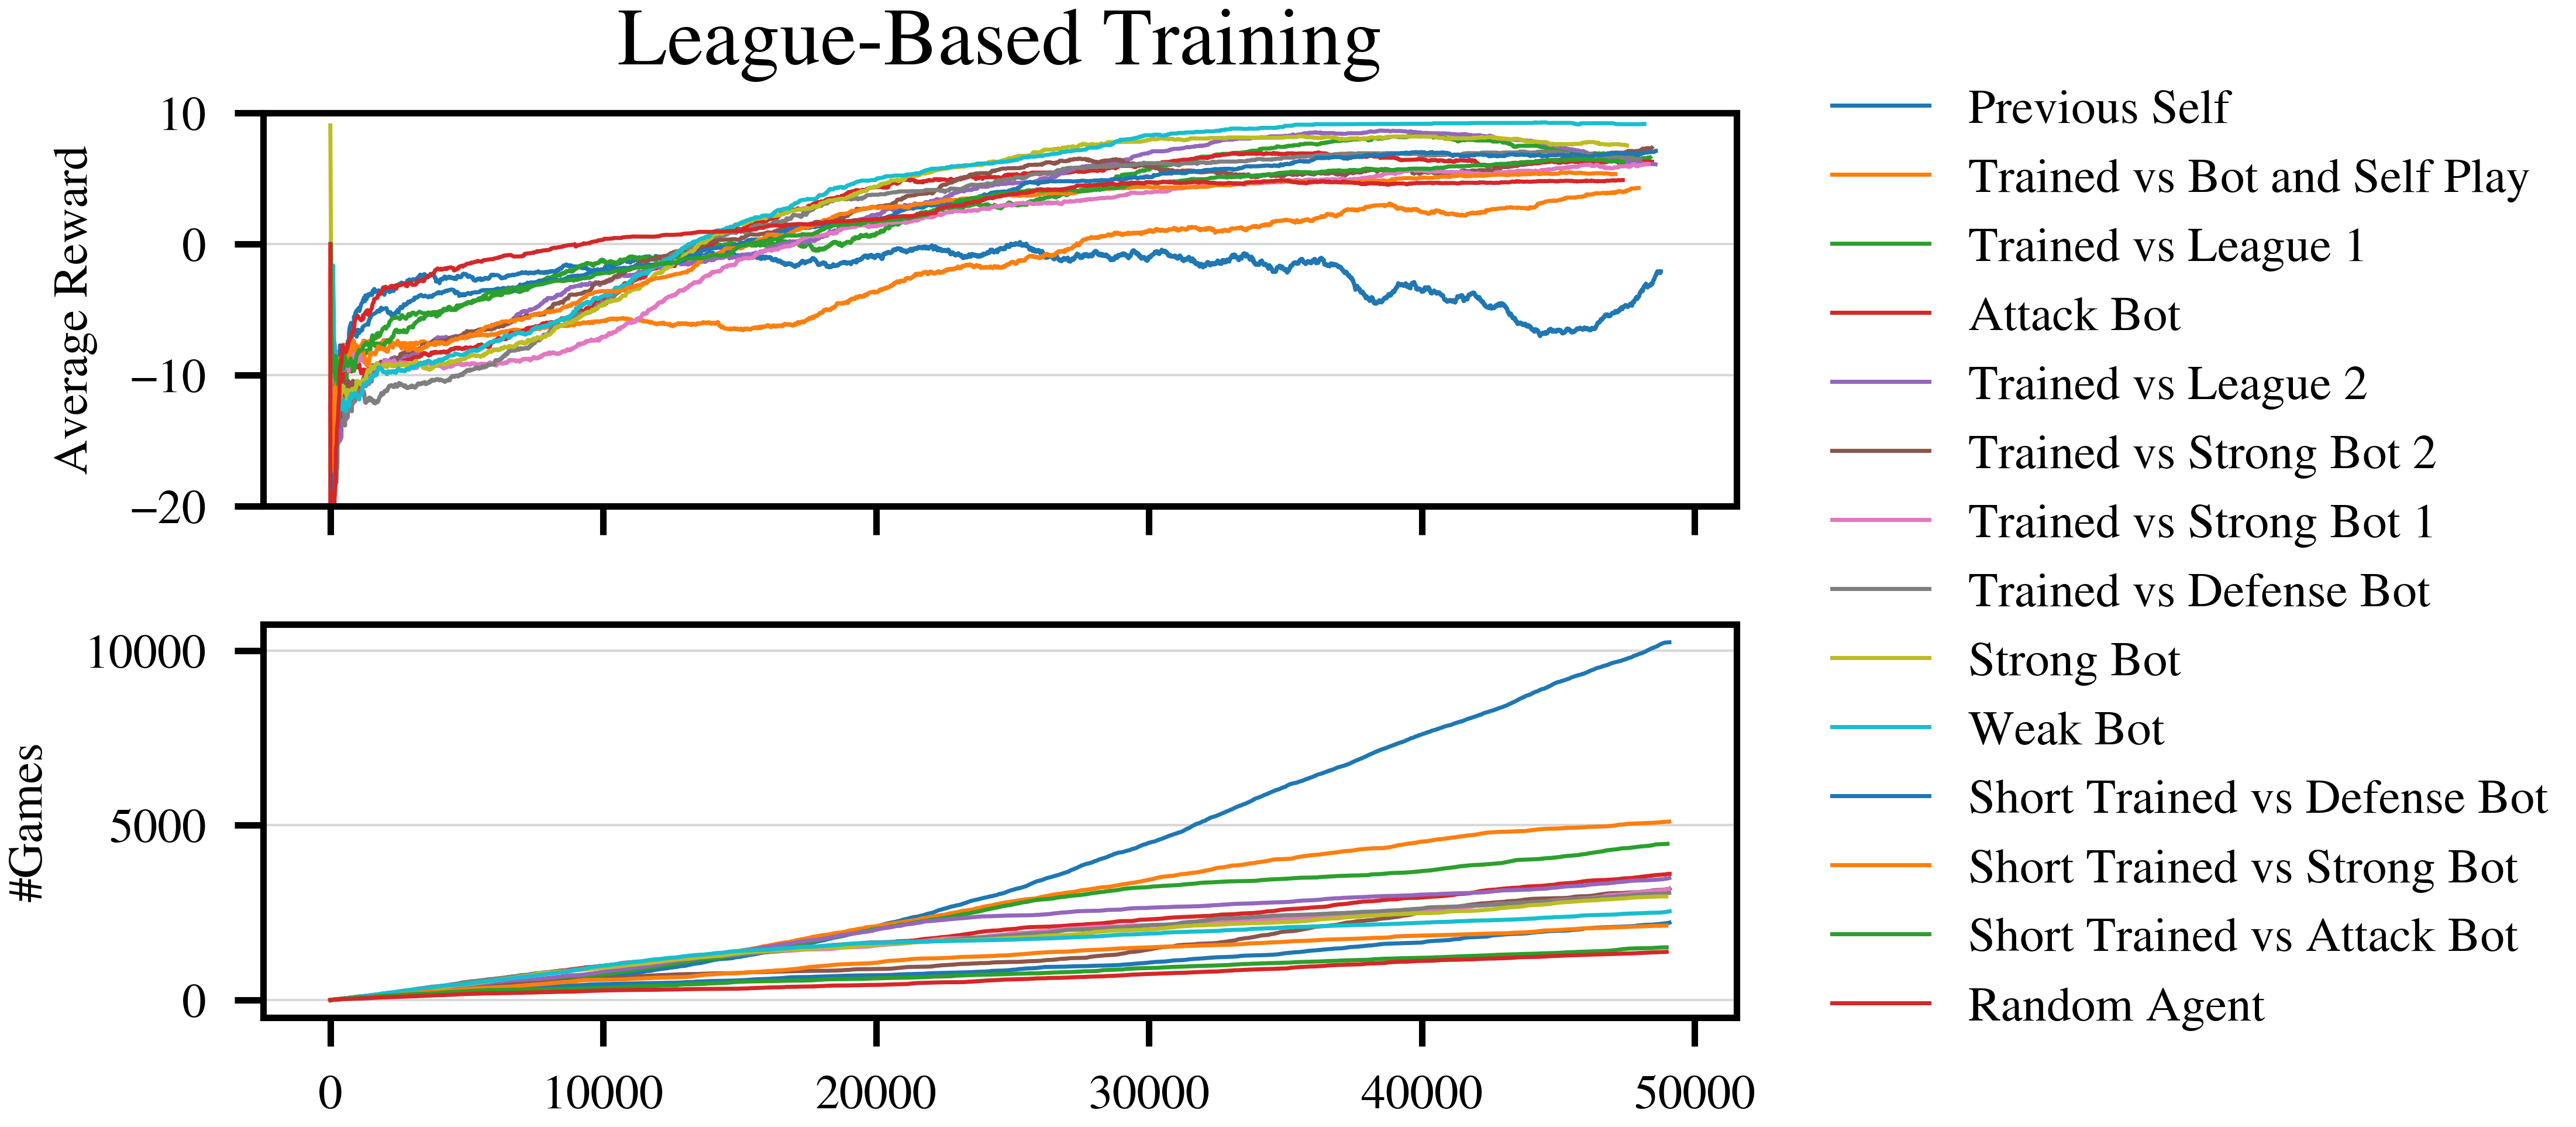

In [25]:
# Load data
path = 'csv_data/league/training_log_league_long.csv'
df = pd.read_csv(path)
smoothing_window = 500



name_map = {
    'prev_self': 'Previous Self',
    'agent2': 'Trained vs Bot and Self Play',
    'agent_trained_vs_league1': 'Trained vs League 1',
    'atk_bot': 'Attack Bot',
    'agent_trained_vs_league2': 'Trained vs League 2',
    'agent4': 'Trained vs Strong Bot 2',
    'agent3': 'Trained vs Strong Bot 1',
    'def_bot': 'Trained vs Defense Bot',
    'strong_bot': 'Strong Bot',
    'weak_bot': 'Weak Bot',
    'agent_trained_vs_defense_bot': 'Short Trained vs Defense Bot',
    'agent_trained_vs_strong_bot': 'Short Trained vs Strong Bot',
    'agent_trained_vs_attack_bot': 'Short Trained vs Attack Bot',
    'agent5_shit_agent': 'Random Agent'
}


# Group by opponent
grouped = df.groupby("opponent")
game_counts = grouped.size().sort_values(ascending=False)

# Create shared figure with 2 subplots
fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.3})

# --- First Plot: Smoothed Rewards ---
ax1 = axes[0]
for opponent in game_counts.index:
    group = grouped.get_group(opponent)
    smoothed_rewards = group["reward"].rolling(window=smoothing_window, min_periods=1).mean()
    ax1.plot(group["episode"][:-50], smoothed_rewards[:-50], lw=0.5, label=f"{name_map[opponent]}")

ax1.yaxis.set_major_locator(plt.MultipleLocator(10))
ax1.grid(axis="y", which="major", color="gray", alpha=0.3, linewidth=0.3, zorder=1)
ax1.set_ylabel('Average Reward', fontsize=6)
ax1.set_ylim([-20, 10])
ax1.set_title('League-Based Training', fontsize=10)

# --- Second Plot: Cumulative Games Played ---
ax2 = axes[1]
for opponent in game_counts.index:
    group = grouped.get_group(opponent).sort_values(by="episode")
    cumulative_games = range(1, len(group) + 1)
    ax2.plot(group["episode"], cumulative_games, lw=0.5, label=f"{opponent}")

ax2.grid(axis="y", which="major", color="gray", alpha=0.3, linewidth=0.3, zorder=1)
ax2.set_ylabel('#Games', fontsize=6)
#ax2.set_title('Number of Games in League-Based Training', fontsize=7.5)

# --- Shared X-axis Label ---
#fig.supxlabel('Episodes', fontsize=6)  # Adds a single x-axis label for both plots

# --- Shared Legend (Outside the Plot) ---
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(
    by_label.values(), 
    by_label.keys(), 
    fontsize=6, 
    loc='center right', 
    bbox_to_anchor=(1.35, 0.5),  # Moves legend outside the figure
    frameon=False
)

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0.5, 0.85, 0.1])  # Leave space for legend
plt.show()

# Save the figure
fig.savefig('fig_SAC_League_combined.png')

